In [47]:
from xlrd import open_workbook
import matplotlib.pyplot as plt 
import requests 
import pandas as pd
import numpy as np
 

In [48]:
analysis = pd.read_excel('movie_data.xlsx')
analysis.head()

,Count,ID,TITLE,BUDGET,REVENUE,RUNTIME,GENRE 1,GENRE 2,IMDB_ID,ORIGINAL TITLE,POPULARITY,RELEASE DATE,OSCAR WINNER,Year
0,0,339403,Baby Driver,34000000,226945087,113.0,Action,Crime,tt3890160,Baby Driver,22.094,2017-06-28,WINNER,2017
1,1,425298,Darkland,0,0,112.0,Thriller,Action,tt5431082,Darkland,4.753,2017-01-19,NO,2017
2,2,419430,Get Out,4500000,255017329,104.0,Mystery,Thriller,tt5052448,Get Out,24.949,2017-02-24,WINNER,2017
3,3,428449,A Ghost Story,100000,1596371,93.0,Drama,Fantasy,tt6265828,"Ghost Story, A",7.997,2017-07-07,NO,2017
4,4,441498,In the Intense Now,0,0,127.0,Documentary,NaN,tt6532954,No Intenso Agora,1.830,2017-11-09,NO,2017


In [49]:
winners = ["The Shape Of Water",
"Moonlight",
"Spotlight"
"Birdman Or (The Unexpected Virtue Of Ignorance)",
"12 Years A Slave",
"Argo",
"The Artist",
"The King's Speech",
"The Hurt Locker",
"Slumdog Millionaire",
"No Country For Old Men",
"The Departed",
"Crash",
"Million Dollar Baby",
"The Lord Of The Rings: The Return Of The King",
"Chicago",
"A Beautiful Mind",
"Gladiator",
"American Beauty",
"Shakespeare In Love",
"Titanic",
"The English Patient",
"Braveheart",
"Forrest Gump",
"Schindler's List",
"Unforgiven",
"The Silence Of The Lambs",
"Dances With Wolves"]
winning_movies = analysis.loc[analysis["TITLE"].isin(winners), :]
winning_movies["Profit"] = winning_movies["REVENUE"] - winning_movies["BUDGET"]
winning_movies['Earning per $ spent'] = winning_movies["REVENUE"]/winning_movies["BUDGET"]
winning_movies['Earning per min'] = winning_movies["REVENUE"]/winning_movies["RUNTIME"]
winning_movies

/Users/parthpatel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/parthpatel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/parthpatel/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

,Count,ID,TITLE,BUDGET,REVENUE,RUNTIME,GENRE 1,GENRE 2,IMDB_ID,ORIGINAL TITLE,POPULARITY,RELEASE DATE,OSCAR WINNER,Year,Profit,Earning per $ spent,Earning per min
46,47,376867,Moonlight,4000000,65046687,111.0,Drama,NaN,tt4975722,Moonlight,11.211,2016-10-21,WINNER,2016,61046687,16.261672,5.860062e+05
510,522,33,Unforgiven,14000000,159157447,131.0,Western,NaN,tt0105695,Unforgiven [2013],13.780,1992-08-07,WINNER,1992,145157447,11.368389,1.214942e+06
539,551,68734,Argo,44500000,232324128,120.0,Drama,Thriller,tt1024648,Argo,11.326,2012-10-11,WINNER,2012,187824128,5.220767,1.936034e+06
723,744,74643,The Artist,15000000,133432856,100.0,Drama,Comedy,tt1655442,"Artist, The",9.459,2011-06-26,WINNER,2011,118432856,8.895524,1.334329e+06
729,750,14,American Beauty,15000000,356296601,122.0,Drama,NaN,tt0169547,Beauty,16.783,1999-09-15,WINNER,1999,341296601,23.753107,2.920464e+06
997,1028,45269,The King's Speech,15000000,414211549,118.0,Drama,History,tt1504320,"King's Speech, The",11.856,2010-09-06,WINNER,2010,399211549,27.614103,3.510267e+06
1433,1490,12162,The Hurt Locker,15000000,42000000,131.0,Drama,Thriller,tt0887912,"Hurt Locker, The",12.377,2008-10-10,WINNER,2008,27000000,2.800000,3.206107e+05
1541,1601,12405,Slumdog Millionaire,15000000,377910544,120.0,Drama,Romance,tt1010048,Slumdog Millionaire,12.473,2008-05-12,WINNER,2008,362910544,25.194036,3.149255e+06
1911,1984,1422,The Departed,90000000,289847354,151.0,Drama,Thriller,tt0407887,"Departed, The",20.750,2006-10-05,WINNER,2006,199847354,3.220526,1.919519e+06
2427,2517,1640,Crash,6500000,98410061,112.0,Drama,NaN,tt0375679,Crash [2004],11.197,2005-05-06,WINNER,2005,91910061,15.140009,8.786613e+05


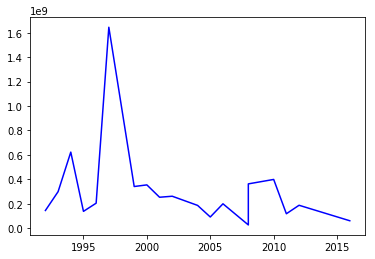

In [50]:

oscar_df = winning_movies.sort_values('Year')
Rev = winning_movies['REVENUE'].unique()
oscar_data = pd.DataFrame({'Rev': Rev})
oscar_data.reset_index(inplace = True)

oscar_df

revenue = oscar_df['Profit']
x_axis = oscar_df["Year"]
plt.plot(x_axis, revenue, color="b")

plt.show()

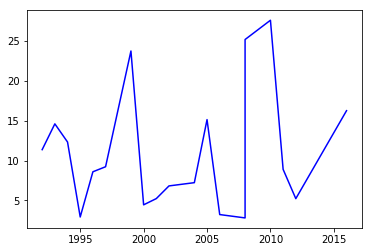

In [42]:
Earning_per_dollar = oscar_df['Earning per $ spent']
x_axis = oscar_df["Year"]
plt.plot(x_axis, Earning_per_dollar, color="b")

plt.show()

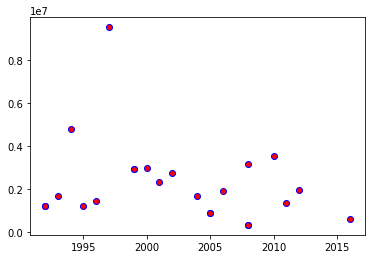

In [43]:
Earning_per_min = oscar_df['Earning per min']
x_axis = oscar_df["Year"]
plt.scatter (x_axis, Earning_per_min,marker="o", facecolors="r", edgecolors="b")
plt.show()